In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
!pip install tensorflow==1.14
# print(tf.__version__)
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import re
from keras import backend as K
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
# Read csv files
df1 = pd.read_csv("products.csv")
df_c = pd.read_csv("categories.csv")
df2 = pd.read_csv("data_2.csv")
df2.head()

,Product,Product Type,Extension\nperiod,Vendor,Effective\nDate,Remarks,Unnamed: 6
0,Apple Juice (canned),Beverages,18 months,NaN,6/1/97,NaN,NaN
1,Apples & Applesauce\n(canned),Fruit,24 months,NaN,6/1/97,NaN,NaN
2,Apricots (canned),Fruit,24 months,NaN,6/1/97,NaN,NaN
3,Baby cereal Del Monte\n(oatmeal based),Baby food,30 days,Del Monte,6/9/04,Del Monte only,NaN
4,Baby cereal Del Monte\n(rice based),Baby food,60 days,Del Monte,6/9/04,Del Monte only,NaN


In [3]:
# select the required columns
df1_f = df1[['Category_ID','DOP_Refrigerate_Min','DOP_Refrigerate_Max','DOP_Refrigerate_Metric']]
df2_f = df2[['Product Type','Extension\nperiod']]

In [4]:
df2_f['num'] = df2_f['Extension\nperiod'].str.extract('(\d+)', expand=True)
df2_f['metric'] = df2_f['Extension\nperiod'].str.extract('([A-Z|a-z]+)', expand=True)
print(df2_f.head())
df2_f = df2_f[['Product Type','metric','num']]
print(df2_f.head())

  Product Type Extension\nperiod num  metric
0    Beverages         18 months  18  months
1        Fruit         24 months  24  months
2        Fruit         24 months  24  months
3    Baby food           30 days  30    days
4    Baby food           60 days  60    days
  Product Type  metric num
0    Beverages  months  18
1        Fruit  months  24
2        Fruit  months  24
3    Baby food    days  30
4    Baby food    days  60


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df2_f = df2_f.dropna()
print(df2_f['metric'].unique())
mappings = {"months":30,"month":30,"yrs":365,"week":7,"weeks":7,"days":1,"years":365,"year":365}
df2_f.metric.replace(mappings,inplace=True)
print(df2_f.head())
print(df2_f.dtypes)
df2_f['metric'] = df2_f['metric'].astype('int',copy=False)
df2_f['num'] = df2_f['num'].astype('int',copy=False)
df2_f["days"] = df2_f['metric']*df2_f['num']
df2_f = df2_f[['Product Type','days']]
print(df2_f.head())

['months' 'days' 'years' 'week' 'month' 'yrs' 'year' 'weeks']
  Product Type  metric num
0    Beverages      30  18
1        Fruit      30  24
2        Fruit      30  24
3    Baby food       1  30
4    Baby food       1  60
Product Type    object
metric           int64
num             object
dtype: object
  Product Type  days
0    Beverages   540
1        Fruit   720
2        Fruit   720
3    Baby food    30
4    Baby food    60


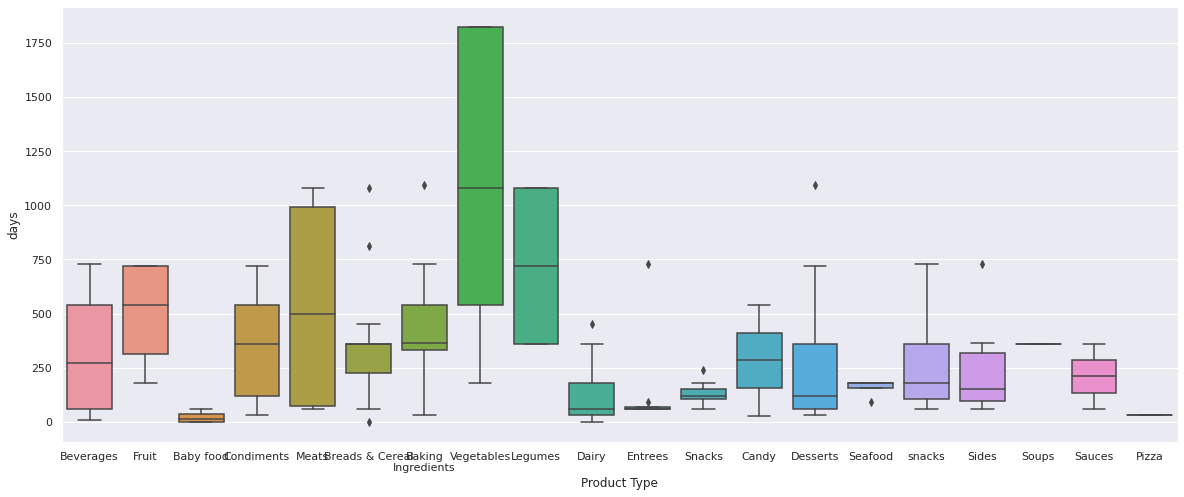

In [6]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.boxplot(x="Product Type", y="days", data=df2_f)

In [7]:
# Processing the products data
df1_f["mean_days"] = df1_f[['DOP_Refrigerate_Max','DOP_Refrigerate_Min']].mean(axis=1)
df1_f = df1_f.dropna()
print(df1_f['DOP_Refrigerate_Metric'].unique())
mappings = {"Months":30,"Weeks":7,"Days":1,"Years":365}
df1_f.DOP_Refrigerate_Metric.replace(mappings,inplace=True)
print(df1_f.head())
df1_f['mean_days'] = df1_f['mean_days']*df1_f['DOP_Refrigerate_Metric']
df1_f = df1_f[['Category_ID','mean_days']]
print(df1_f.head())

['Months' 'Weeks' 'Days' 'Years']
   Category_ID  DOP_Refrigerate_Min  ...  DOP_Refrigerate_Metric  mean_days
0            7                  1.0  ...                      30        1.5
1            7                  1.0  ...                       7        1.5
2            7                  6.0  ...                      30        6.0
3            7                 12.0  ...                      30       12.0
4            7                  1.0  ...                      30        1.0

[5 rows x 5 columns]
   Category_ID  mean_days
0            7       45.0
1            7       10.5
2            7      180.0
3            7      360.0
4            7       30.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


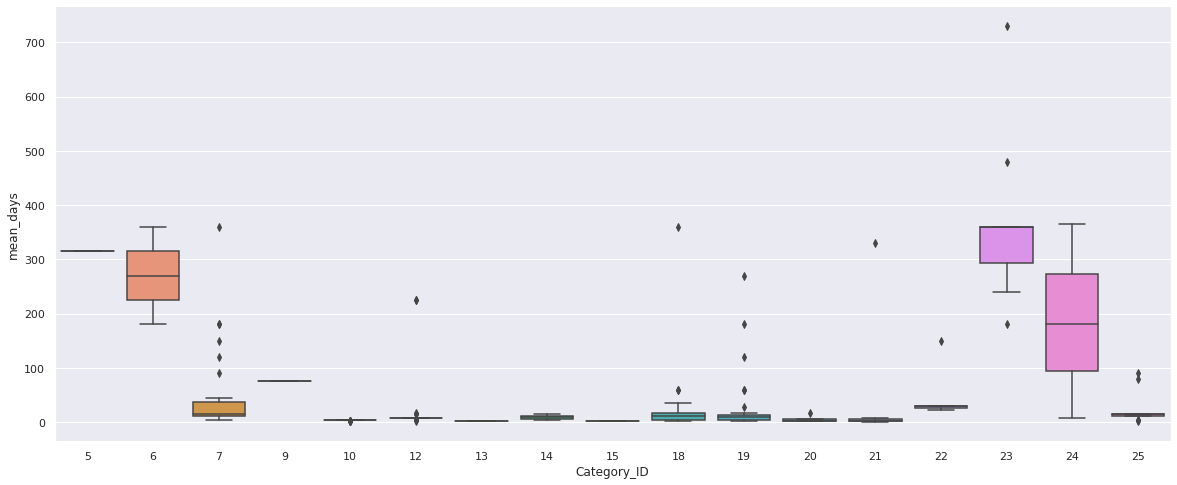

In [8]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.boxplot(x="Category_ID", y="mean_days", data=df1_f)

In [9]:
print(df_c) #Data1
df2_f['Product Type'].unique()# Data_2

    ID                      Category_Name      Subcategory_Name
0    1                          Baby Food                   NaN
1    2                        Baked Goods                Bakery
2    3                        Baked Goods    Baking and Cooking
3    4                        Baked Goods    Refrigerated Dough
4    5                          Beverages                   NaN
5    6  Condiments, Sauces & Canned Goods                   NaN
6    7              Dairy Products & Eggs                   NaN
7    8              Food Purchased Frozen                   NaN
8    9              Grains, Beans & Pasta                   NaN
9   10                               Meat                 Fresh
10  11                               Meat    Shelf Stable Foods
11  12                               Meat   Smoked or Processed
12  13                               Meat  Stuffed or Assembled
13  14                            Poultry   Cooked or Processed
14  15                            Poultr

array(['Beverages', 'Fruit', 'Baby food', 'Condiments', 'Meats',
       'Breads & Cereal', 'Baking\nIngredients', 'Vegetables', 'Legumes',
       'Dairy', 'Entrees', 'Snacks', 'Candy', 'Desserts', 'Seafood',
       'snacks', 'Sides', 'Soups', 'Sauces', 'Pizza'], dtype=object)

In [10]:
# # Finding common Categories
# #category_ID mappings:
category_ID_mappings = {
     "Beverages":5,"Fruit":8,"Baby food":1,"Condiments":6,"Meats":11,"Legumes":24,"Breads & Cereal":2,"Baking\nIngredients":3,"Vegetables":26,"Legumes":27,'Dairy':7,'Entrees':25,
'Snacks':23,'Candy':28,'Desserts':28,'Seafood':20,'snacks':23,'Sides':25,'Soups':6,'Sauces':6,'Pizza':25}
df2_f['Product Type'].replace(category_ID_mappings,inplace=True)
print(df2_f['Product Type'].unique())

[ 5  8  1  6 11  2  3 26 27  7 25 23 28 20]


In [11]:
df2_f.rename(columns = {'Product Type':'Category_ID','days':'mean_days'}, inplace = True) 
df_f = pd.concat([df1_f,df2_f])

In [12]:
df_f['Category_ID'] = df_f['Category_ID'].astype('category',copy=False)
df_f = pd.get_dummies(df_f)

In [13]:





df_f.columns

Index(['mean_days', 'Category_ID_1', 'Category_ID_2', 'Category_ID_3',
       'Category_ID_5', 'Category_ID_6', 'Category_ID_7', 'Category_ID_8',
       'Category_ID_9', 'Category_ID_10', 'Category_ID_11', 'Category_ID_12',
       'Category_ID_13', 'Category_ID_14', 'Category_ID_15', 'Category_ID_18',
       'Category_ID_19', 'Category_ID_20', 'Category_ID_21', 'Category_ID_22',
       'Category_ID_23', 'Category_ID_24', 'Category_ID_25', 'Category_ID_26',
       'Category_ID_27', 'Category_ID_28'],
      dtype='object')

In [14]:
df_f.head()

,mean_days,Category_ID_1,Category_ID_2,Category_ID_3,Category_ID_5,Category_ID_6,Category_ID_7,Category_ID_8,Category_ID_9,Category_ID_10,Category_ID_11,Category_ID_12,Category_ID_13,Category_ID_14,Category_ID_15,Category_ID_18,Category_ID_19,Category_ID_20,Category_ID_21,Category_ID_22,Category_ID_23,Category_ID_24,Category_ID_25,Category_ID_26,Category_ID_27,Category_ID_28
0,45.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,360.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


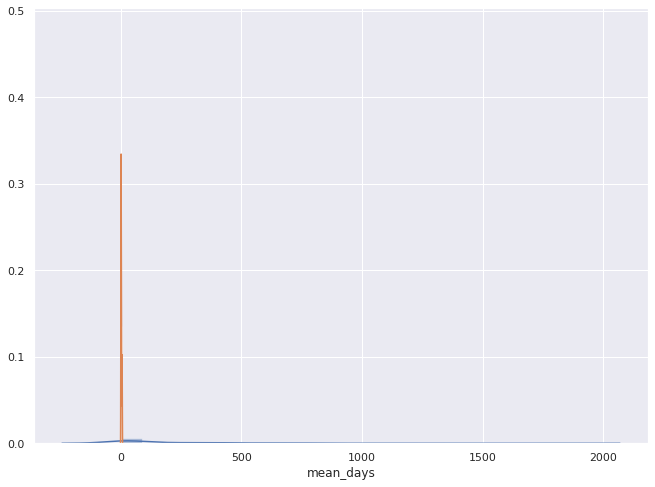

In [15]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df_f['mean_days'])
target = np.log(df1_f['mean_days'])
sns.distplot(target)

In [16]:
Y = df_f['mean_days']
df_x = df_f
del df_x['mean_days']


In [17]:
x_train,x_test,y_train,y_test = train_test_split(df_x,Y,test_size=0.1,random_state = 42)

In [18]:
list(x_test.loc[0,:])

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
df_x.head()

,Category_ID_1,Category_ID_2,Category_ID_3,Category_ID_5,Category_ID_6,Category_ID_7,Category_ID_8,Category_ID_9,Category_ID_10,Category_ID_11,Category_ID_12,Category_ID_13,Category_ID_14,Category_ID_15,Category_ID_18,Category_ID_19,Category_ID_20,Category_ID_21,Category_ID_22,Category_ID_23,Category_ID_24,Category_ID_25,Category_ID_26,Category_ID_27,Category_ID_28
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=[len(df_x.columns)]),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='relu'),
])
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:

model.summary()
EPOCHS = 100

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [22]:
test_predictions = model.predict(x_test).flatten()
print(test_predictions)
model.evaluate(x_test,y_test)

[   2.5082695   52.597164     2.5082695  457.52002     72.33303
  105.359085   356.7565      87.63202    598.13794    522.9154
   23.926043    52.597164   233.70184     52.597164   303.73157
   52.597164    34.807724   550.1813     522.9154      52.597164
   87.63202    285.11255     87.63202    285.11255     52.597164
  303.73157     87.63202    105.359085     2.5082695    2.5082695
  303.73157    457.52002     23.926043   356.7565      87.63202
    2.5082695   52.597164  1016.08154    457.52002    550.1813
   87.63202     43.479034   105.359085    52.597164   522.9154
    2.2281582  105.35907  ]
47/47 [==============================] - 0s 120us/sample - loss: 54439.3868 - acc: 0.0000e+00


[54439.3868018617, 0.0]

In [25]:
print([node.op.name for node in model.outputs])
print([input.op.name for input in model.inputs])
print(model.outputs)
print(model.inputs)
test = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
test = test.reshape(1,25)
model.predict(test)

['dense_2/Relu']
['dense_input']
[<tf.Tensor 'dense_2/Relu:0' shape=(?, 1) dtype=float32>]
[<tf.Tensor 'dense_input:0' shape=(?, 25) dtype=float32>]


array([[87.632]], dtype=float32)

In [26]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.
    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

# save keras model as tf pb files ===============
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
session = keras.backend.get_session()
init = tf.global_variables_initializer()
session.run(init)

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, "/content", "regression_model.pb", as_text=False)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 23 variables.
INFO:tensorflow:Converted 23 variables to const ops.


'/content/regression_model.pb'

In [27]:
import tensorflow as tf
import os
import sys
from tensorflow.python.platform import gfile
session = tf.InteractiveSession()

In [28]:
f = gfile.FastGFile("/content/regression_model.pb","rb")

Instructions for updating:
Use tf.gfile.GFile.


In [29]:
graph_def = tf.GraphDef()
graph_def.ParseFromString(f.read())
f.close()

In [30]:
session.graph.as_default()
tf.import_graph_def(graph_def)

In [31]:
print("output",model.outputs)
print("input",model.input)

output [<tf.Tensor 'dense_2/Relu:0' shape=(?, 1) dtype=float32>]
input Tensor("dense_input:0", shape=(?, 25), dtype=float32)


In [32]:
my_output_tensor = session.graph.get_tensor_by_name("import/dense_2/Relu:0")

In [34]:
test = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
test = test.reshape(1,25)
session.run(my_output_tensor,{"import/dense_input:0":test})

array([[0.05772885]], dtype=float32)

In [32]:
print(test)

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


FailedPreconditionError: ignored